# sobel function

mag,theta = sobel(f)

mag,theta: Image.

f: Image. input image

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import sys,os
ia898path = os.path.abspath('/etc/jupyterhub/ia898_1s2017/')
if ia898path not in sys.path:
    sys.path.append(ia898path)
import ia898.src as ia

ia636path = os.path.abspath('/home/lotufo/ia636/ia636/')
if ia636path not in sys.path:
    sys.path.append(ia636path)
testing = (__name__ == "__main__")

In [2]:
def pconv(f, h):
    f, h = np.asarray(f), np.asarray(h,dtype=float)
    #faux, haux = ravel(f), ravel(h) 
    s = f.shape
    # Checking the shape of the image F.
    if len(f.shape) == 1:
        f = f[np.newaxis,np.newaxis,:]
    elif len(f.shape) == 2:
        f = f[np.newaxis,:,:]
    # Checking the shape of the image H.
    if len(h.shape) == 1:
        h = h[np.newaxis,newaxis,:]
    elif len(h.shape) == 2:
        h = h[np.newaxis,:,:]
        # Getting the dimensions of images F and H
        (fslices, frows, fcols) = f.shape
        (hslices, hrows, hcols) = h.shape
    ds1 = int((hslices-1)/2.)
    ds2 = hslices - ds1 
    dr1 = int((hrows-1)/2.)
    dr2 = hrows - dr1
    dc1 = int((hcols-1)/2.)
    dc2 = hcols - dc1
    p = np.concatenate((np.concatenate((f[-ds2+1::,:,:], f)), f[0:ds1,:,:]))
    p = np.concatenate((np.concatenate((p[:,-dr2+1::,:], p), 1), p[:,0:dr1,:]), 1)
    p = np.concatenate((np.concatenate((p[:,:,-dc2+1::], p), 2), p[:,:,0:dc1]), 2)
    
    g = np.zeros((fslices,frows,fcols))

    for i in range(hslices):
        for j in range(hrows):
            for k in range(hcols):
                hw = h[hslices-i-1, hrows-j-1, hcols-k-1]
                if (hw):
                    g = g + h[hslices-i-1,hrows-j-1,hcols-k-1] * p[i:fslices + i,j:frows + j, k:fcols + k]
        g.shape = s
    return g

In [3]:
def iasobel(f):
    wx = np.array([[1.,2.,1.],[0.,0.,0.],[-1.,-2.,-1.]])
    wy = np.array([[1.,0.,-1.],[2.,0.,-2.],[1.,0.,-1.]])
    gx = pconv(f, wx)
    gy = pconv(f, wy)
    mag = np.abs(gx + gy*1j)
    theta = np.arctan2(gy,gx)
    return mag,theta

""
a) - Original Image

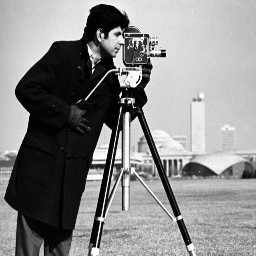


Prewitt´s Mask
[[-1, -1, -1], [0, 0, 0], [1, 1, 1]]


""
b) Prewitt´s Mask filtering

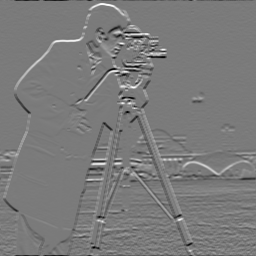

""
c) absolute of Prewitt´s Mask filtering

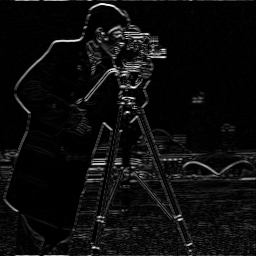

In [4]:
f = mpimg.imread('/home/lotufo/ia898/data/cameraman.tif')
ia.adshow(f, title = 'a) - Original Image')
h = [[-1,-1,-1],[0,0,0],[1,1,1]]
g = pconv(f,h)
print("\nPrewitt´s Mask")
print(h)
gn = ia.normalize(g, [0,255])
ia.adshow(gn, title = 'b) Prewitt´s Mask filtering') 
ia.adshow(ia.normalize(abs(g)), title = 'c) absolute of Prewitt´s Mask filtering')